# tetrahedron structure
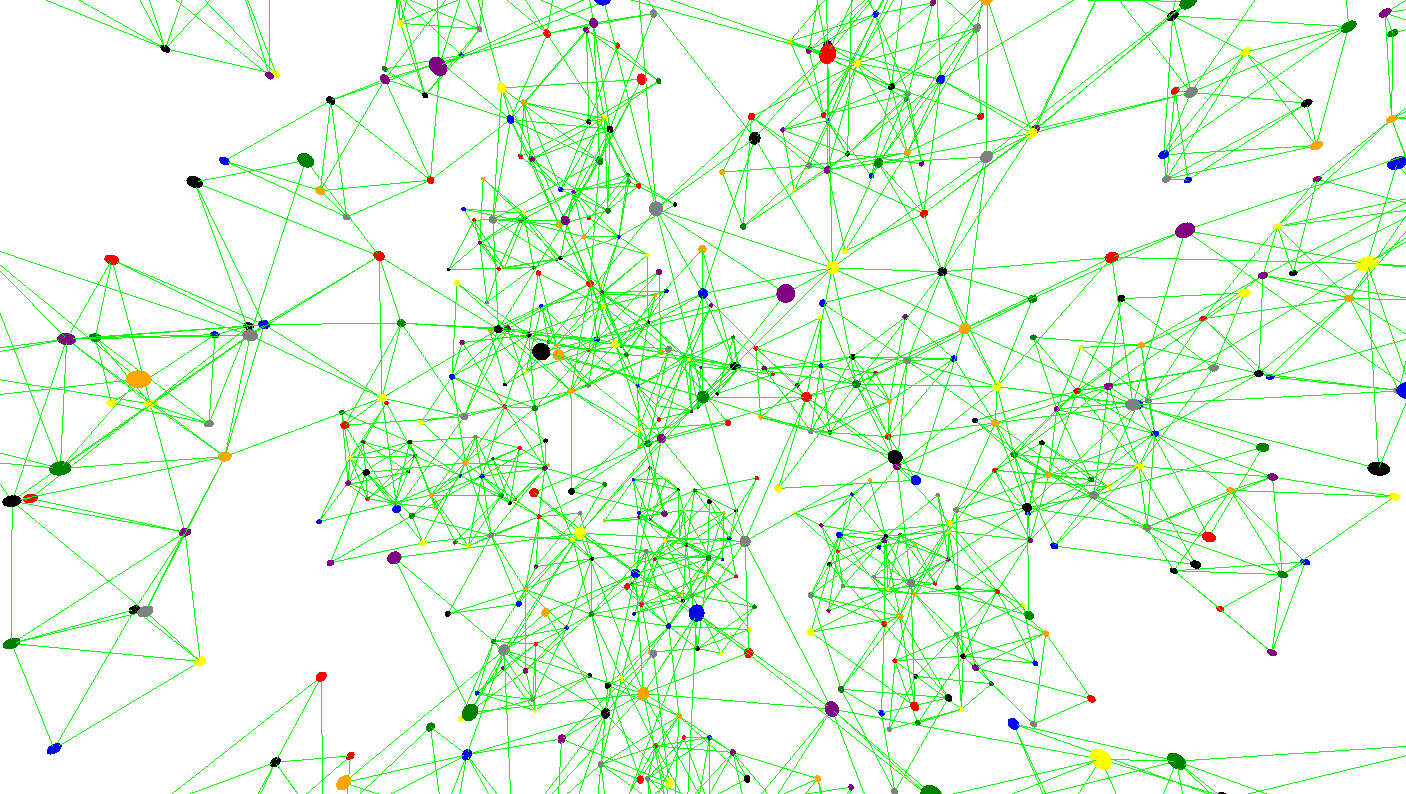

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install scipy

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.optimize import fsolve

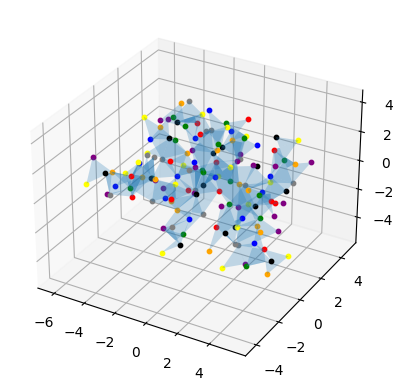

In [29]:
def FindVertex(a, b, c):
    ac = c - a
    ab = b - a
    abxac = np.cross(ab, ac)
    ed = abxac / np.linalg.norm(abxac)
    ag = (ab + ac) / 3

    def equation(x):
        ad = x * ed + ag
        return np.dot(ad, ad) - np.dot(ab, ab)

    x1, = fsolve(equation, 1)
    x2, = fsolve(equation, -1)
    return [a + x1 * ed + ag, a + x2 * ed + ag]

def NearVlist(p,vlistwc,elength):
    for nvk in range(len(vlistwc)):
        if np.linalg.norm(vlistwc[nvk][0] - p) < 0.999*elength:
            return True
    return False

def NearVlistWC(p, c,vlistwc,elength):
    for nvk in range(len(vlistwc)):
        if c == vlistwc[nvk][1]:
            if np.linalg.norm(vlistwc[nvk][0] - p) < np.sqrt(3) * elength:
                return True
    return False

def collect_simulation_data(iterations):
    a = np.array([1, 0, 0])
    b = np.array([0, 1, 0])
    c = np.array([0, 0, 1])
    dlist = FindVertex(a, b, c)
    elength = np.linalg.norm(a - b)
    colornum = set(range(1, 9))

    vlistwc = [[a, 1], [b, 2], [c, 3], [dlist[0], 4], [dlist[1], 5]]
    tlistwc = [[[a, 1], [b, 2], [c, 3], [dlist[0], 4]], [[a, 1], [b, 2], [c, 3], [dlist[1], 5]]]
    tlist = [[v[0] for v in tetra] for tetra in tlistwc]

    for _ in range(iterations):
        Tetrawc = random.choice(tlistwc)

        for i in range(4):
            trianglewc = [x for j, x in enumerate(Tetrawc) if j != i]
            NewV = (2/3) * np.sum([x[0] for x in trianglewc], axis=0) - Tetrawc[i][0]
            colors = {x[1] for x in trianglewc}
            NewClist = list(colornum - colors)
            NewC = random.choice(NewClist)
            NewTetrawc = trianglewc + [[NewV, NewC]]

            if not (NearVlist(NewV, vlistwc, elength) or NearVlistWC(NewV, NewC, vlistwc, elength)):
                vlistwc.append([NewV, NewC])
                tlistwc.append(NewTetrawc)
                tlist.append([v[0] for v in NewTetrawc])

    return vlistwc, tlist


colorset = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'gray', 'black']
vlistwc, tlist = collect_simulation_data(700)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for tetra in tlist:
    ax.add_collection3d(Poly3DCollection([tetra], alpha=0.25))
for v, color in vlistwc:
    ax.scatter(v[0], v[1], v[2], c=colorset[color-1], s=10)

plt.show()